#[Multiple Linear Regression
(Examples from "Data to Fish")](https://datatofish.com/multiple-linear-regression-python/)

As we said in stpe M5.1.3 GLM is a technique that transforms the outcome variables using a link function that allows us to convert our model to a form similar to linear regression. The simplest form of GLM is the linear regression model which  we introduced in step M1.3.9.. The form of the link function that gives Ordinarry least squares regression from a GLM is an identy link function:

$$g(y)=y=\alpha+ \beta_1. X_1 + \epsilon_i $$

In M1.3.9 we introducded the concept of multiple regression using Statsmodel OLS, but we didn't discuss the assumptions behind it or show you how to test the independence of error for example. In the following example, we will do a multiple linear regression using both GLM and OLS to predict the stock index price (i.e., the dependent variable) of a fictitious economy by using 2 independent/input variables:

Interest Rate
Unemployment Rate

In this example we will validate the assumptions of the both GLM and OLS before we apply linear regression models. Most notably, you have to make sure that a linear relationship exists between the dependent variable and the independent variable/s (more on that under the checking for linearity section).

![probabiltiy_example](https://www.computing.dcu.ie/~amccarren/mcm_images/mul_linear_regression_data.png)


Let’s now use python code to demonstrate how to use a Statsmodels GLM on the data-set that we’ll be using:



————————————————————————————————————————————————————


OLS（Ordinary Least Squares）是最基本的线性回归方法，旨在最小化误差平方和（Sum of Squared Errors, SSE）：

𝑆
𝑆
𝐸
=
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
𝑖
^
)
2
SSE=
i=1
∑
n
​
 (y
i
​
 −
y
i
​

^
​
 )
2

OLS 的标准公式：

𝑦
=
𝛼
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝜖
y=α+β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +⋯+ϵ
OLS 假设：

线性关系：自变量和因变量之间的关系是线性的。
误差独立性：误差项（Residuals）彼此独立。
误差正态性：误差项服从正态分布。
同方差性（Homoscedasticity）：误差的方差在不同的
𝑋
X 值上保持一致。
无多重共线性（Multicollinearity）：自变量之间不应高度相关。
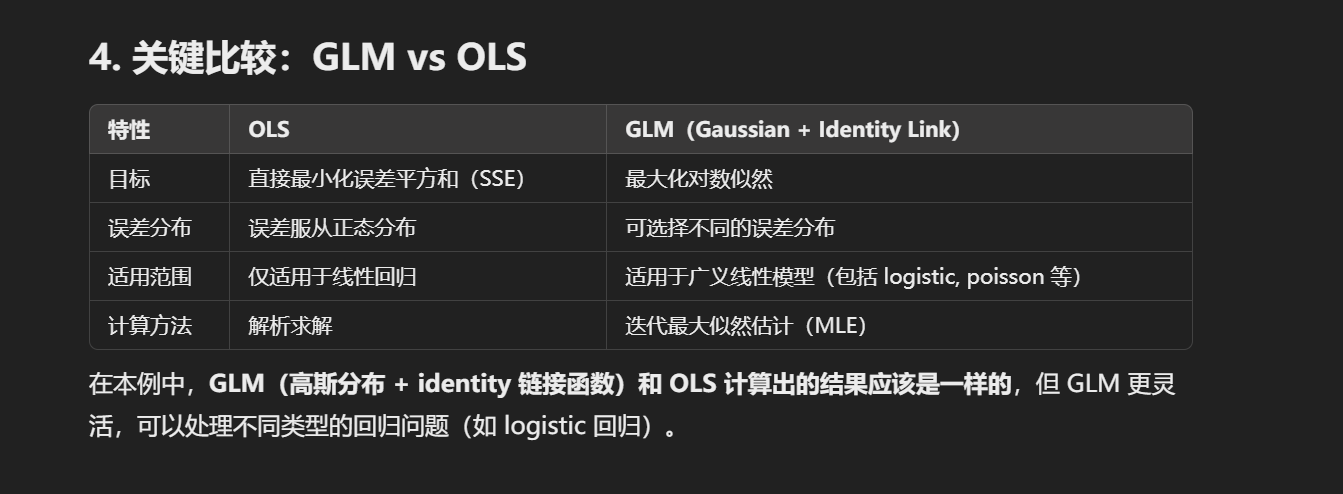


To start, you may capture the above data-set in Python using a pandas DataFrame:

In [ ]:
from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
df['Time Point']=df.index
%matplotlib inline
#df.plot.scatter(x='Time Point', y='Interest_Rate')
#df.plot.scatter(x='Time Point', y='Unemployment_Rate')



corr = df[['Interest_Rate','Unemployment_Rate','Stock_Index_Price']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Interest_Rate,Unemployment_Rate,Stock_Index_Price
Interest_Rate,1.000000,-0.925814,0.935793
Unemployment_Rate,-0.925814,1.000000,-0.922338
Stock_Index_Price,0.935793,-0.922338,1.000000


Examining the collinearity between the variables is important, but remember don't assume collinearity proves causality. Remember, when interpretating parameter estimates it is vital to maintain our assumptions.

</br>
We can see from the corelation matrix that there is a linear relationship between the Stock Index Price and both Unemployement rate and Interest rate. We can also see that the Interest Rate is related to the Uneployement rate.


Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

We can also examine the linear relationship between the dependent and independent variables using scatter plots. The code below confirms this,utilizing the matplotlib library:

The following code helps us estimate the impact of the muti-colinearity in the model. We can see that it exists but it is not excessive < 10)

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }
X=df[['Interest_Rate','Unemployment_Rate']]
X = add_constant(X)
y=df['Stock_Index_Price']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[6.9994173399627195, 6.999417339962709]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[6.9994173399627195, 6.999417339962709]


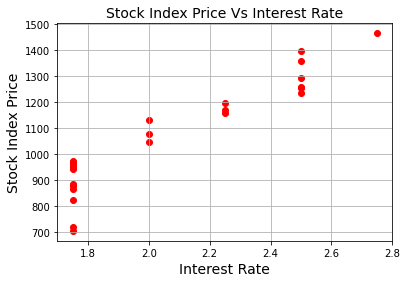

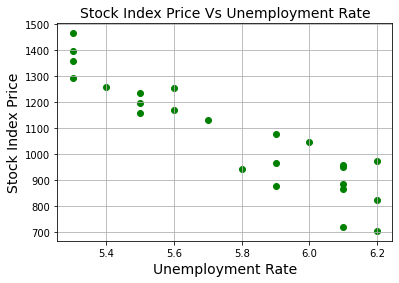

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }
X=df[['Interest_Rate','Unemployment_Rate']]
X = add_constant(X)
y=df['Stock_Index_Price']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

As you can see, a linear relationship exists in both cases:

In the first case, when interest rates go up, the stock index price also goes up.
In the second case, when unemployment rates go up, the stock index price goes down (here we still have a linear relationship, but with a negative slope)
Next, we are going to perform the actual multiple linear regression in Python.


**Performing the Multiple Linear Regression**

Once you added the data into Python, you may use  statsmodels to get the regression results using either the statsmodel..

Either method would work, but I’ll show you both methods for illustration purposes.

You may then copy the below code into Python, before we dive into the results:
————————————————————————————————————————————————————————————

OLS 和 GLM 在误差假设上的主要区别是：

OLS（普通最小二乘回归） 假设 误差是独立正态分布的（Independent & Normally Distributed）。
GLM（广义线性模型） 只假设 误差是独立的（Independent），但不一定是正态分布，可以是其他分布（如泊松、二项等）。

In the first case, when interest rates go up, the stock index price also goes up.
In the second case, when unemployment rates go up, the stock index price goes down (here we still have a linear relationship, but with a negative slope)
Next, we are going to perform the actual multiple linear regression in Python.

Performing the Multiple Linear Regression
Once you added the data into Python, you may use both sklearn and statsmodels to get the regression results.

Either method would work, but statsmodels.OLS give a much greater amount of analysis, but statsmodels.GLM gives for more options to change the structure of your link function and the assumption of what family your distribution comes from. In this case we assume a gaussion continous distribution for the dependent variable. This won't be the case all the time when using binary variables we would want to have a logit link function and assume the distribution is a binomial.

You may then copy the below code into Python, before we dive into the results:

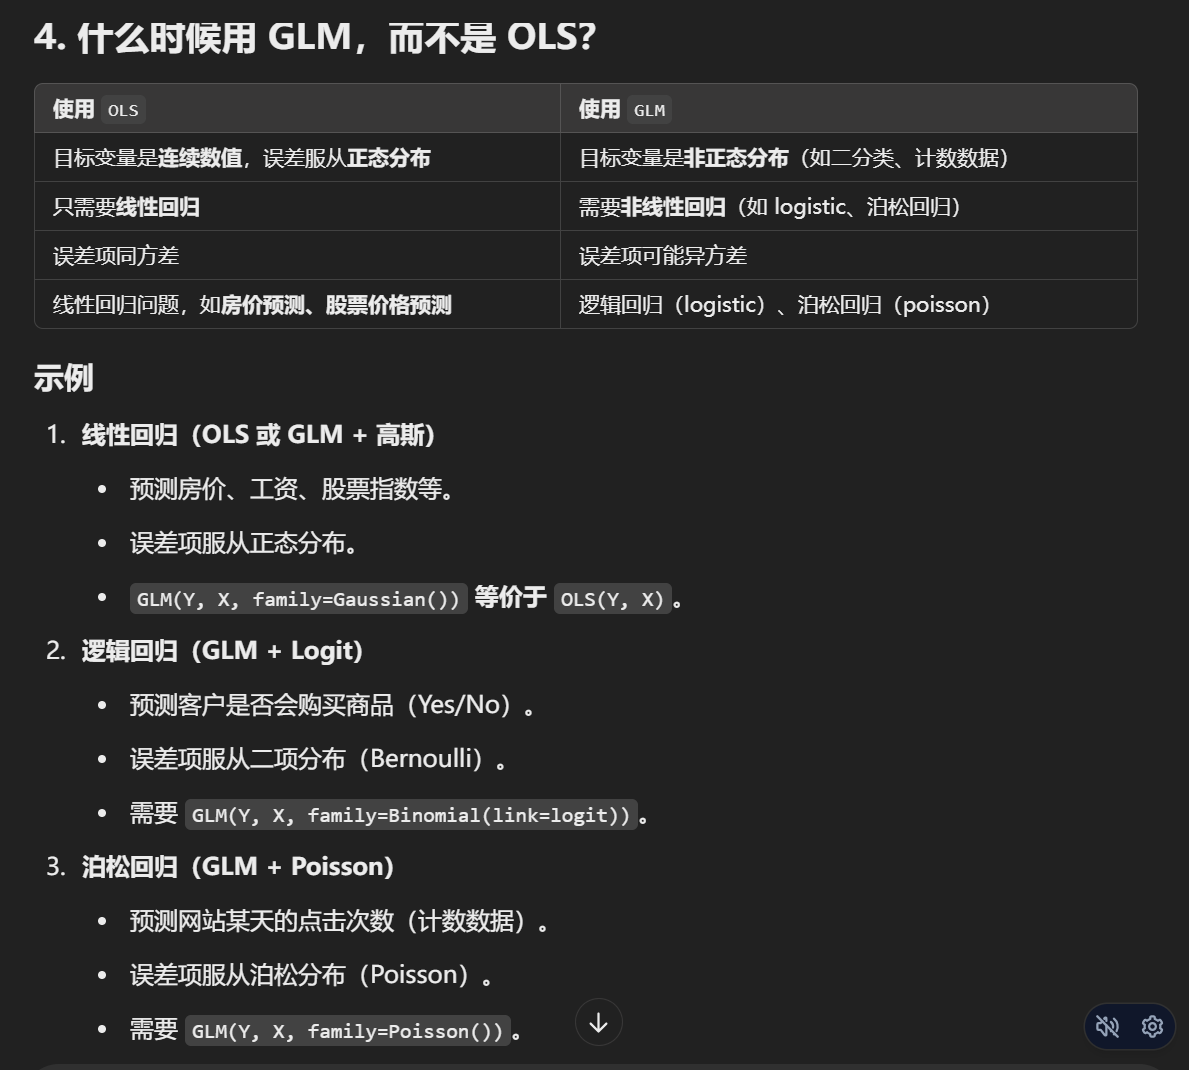

In [ ]:

from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
#X = df[['Interest_Rate']] # here we have 1 variable for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets

Y = df['Stock_Index_Price']

# with sklearn
#regr = linear_model.LinearRegression()
#regr.fit(X, Y)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)
# prediction with sklearn
#New_Interest_Rate = 2.75
#New_Unemployment_Rate = 5.3
#print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant

model=sm.GLM(Y, X,family=sm.families.Gaussian(sm.families.links.identity())).fit()#GLM, Generalized Linear Model
#model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

#----------------------------------------------------------------------
#使用了 statsmodels 库中的 广义线性模型（GLM, Generalized Linear Model） 进行回归分析。
#由于我们假设误差项服从 高斯分布，并且使用 恒等链接函数，所以 GLM 在这个特定情况下等价于 OLS。



                 Generalized Linear Model Regression Results                  
Dep. Variable:      Stock_Index_Price   No. Observations:                   24
Model:                            GLM   Df Residuals:                       21
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          4979.0
Method:                          IRLS   Log-Likelihood:                -134.61
Date:                Fri, 04 Oct 2024   Deviance:                   1.0456e+05
Time:                        16:21:58   Pearson chi2:                 1.05e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9995
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.04e-11
Time:                        14:30:59   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

We have now got a much more extensive analysis to determine if the our model works. We won't go into enormous detail here but lets focus on the error term and the paremater estimates.

**Error Analysis**

The error term has been analysed using a number of statistics in this analysis. The first is the 'Jarque-Bera' statistic. This gives a $Chi^2$ probability value of 0.44, which is not significant ie >0.05. This tells us that there is no evidence to suggest that error term does not follow a normal distribution. A note of warning, many practioneers prefer to use an alternative test such as the Shapiro Wilks test.

The next one we look at is the Durbin Watson which has a value of 0.53. Generally, if this lies between 2 values oulined in the [here](https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf), then we can accept the assumuption that there is no significant auto-correlation between the errors. However, in our situation the value of 0.53 implies there is evidence to suggest that the errors are not  independent.

We will deal with this in the next section.
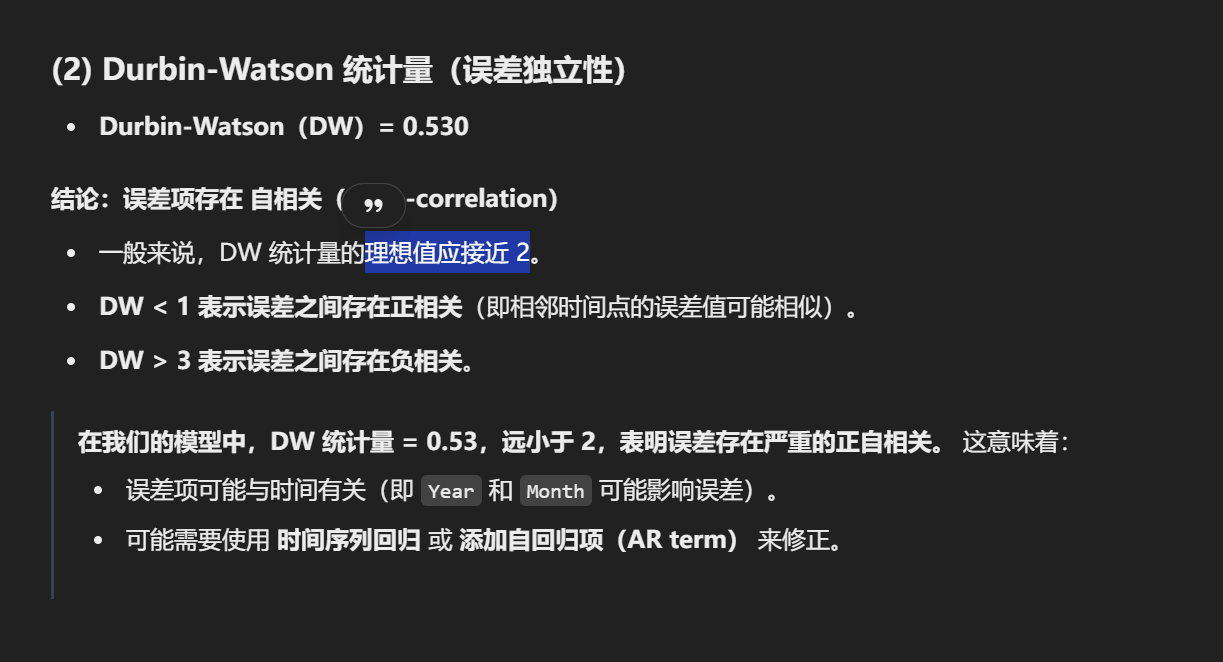
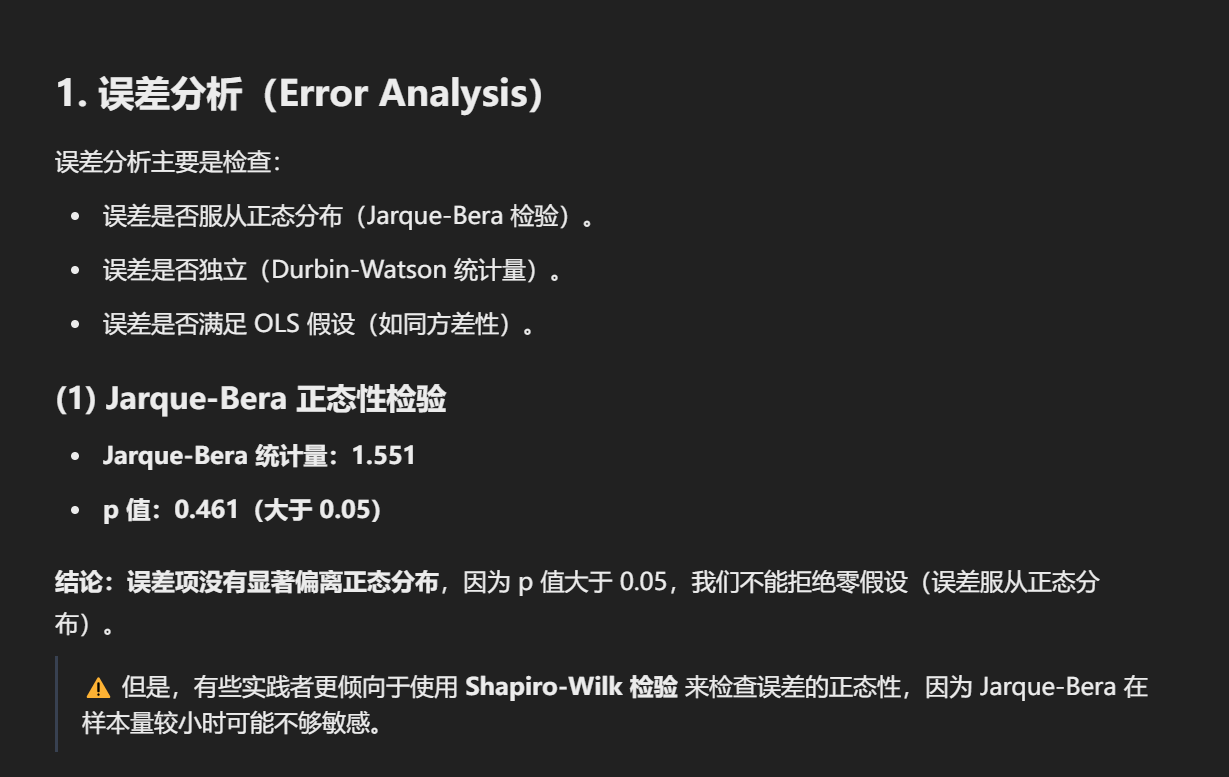

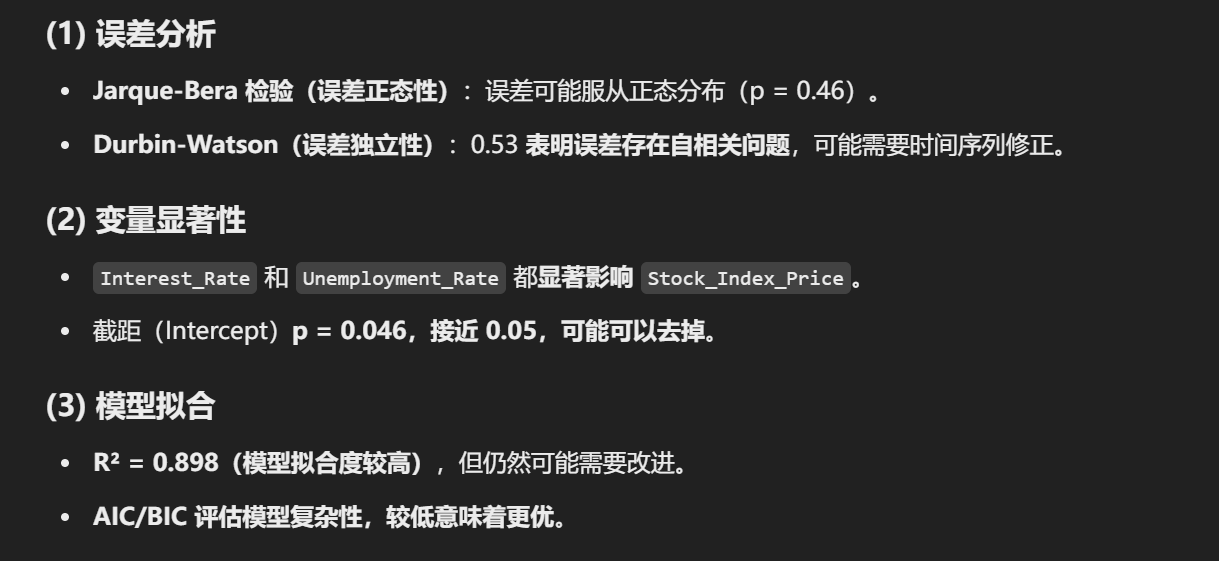



**Model Fit**

You will note that the $R^2$ is 0.89. This value will range between 0 and 1. Where 0 reperesents a complete lack of fit and 1 being a perfect fit. Remember, it is not the holy grail of modelling as in theory you will get a perfect fit if you have as many parameters as the number of data points.

Generally, we do a few quick checks. The first is to examine the $P>|t| $ for each paremeter. From the results above we have a sub table shown below which describes the parameter analysis:

![regression_results](https://drive.google.com/uc?export=view&id=1HfcVaP443Fd0GiqD9pI12HqS3ST7IK77)


The p value for the intercept ($a$), Interest Rate slope ($b_1$)  and Unemployement Rate Slope are given as 1798.40,345.54 and -250.14  respectively. These results tell us that the intercept ($a$) is not significantly different from zero but there is strong evidence that independent  variable are, as the p values $< 0.05$.

-----------------------------------------------------------------
如果截距项的 p 值远远大于 0.05（比如 0.3、0.5），则可以考虑去掉截距项，使用 无截距模型（fit_intercept=False）。

This tells us that we could use a model with no intercept. But be very careful here. You should never remove the intercept unless you have substanial evidence that there is no theoritical intercept. You can also examine the AIC(55.20)(Akaike Information Criterion) and BIC(55.36)(Bayesian Information Criterion). Both of these terms are very useful as they will penalise large models relative to the information they are attempting to model. If you add more independent variables and the quality of the results does not improve then both measures will increase.



The following formulas show how we can calulate adjustment figures for our data that allow us to remove the autocorrelation.

Tyically, the formula for a simple regression model is:

>$y_{i}=a+bx_{i} + e_{i}$ $ where $ $i=1 $ $to$  $n$

if we now realise that $e_{i}$ is auto-correlated then we can assume the following:
$(y_{i}-(a+bx_{i}))-\alpha(y_{i-1}-(a+bx_{i-1}))= e_{i}-\alpha(e_{i-1})$

Which implies

$y_i - \alpha(y_{i-1}) = \alpha_{new}$ +$b_{new}.(x_{i}-\alpha(x_{i-1})) + \epsilon_i$

We now have $y_{new}=y_i - \alpha(y_{i-1})$ and $x_{new}=x_{i}-\alpha(x_{i-1}$ and we can use this new dataset to calculate the $\alpha_{new}$  and $b_{new} $

The following code does a first order autocorrelation analysis on the above data. You will notice the durbin watson increases to 1.22. You may want to compare this to the tables outlined [here](https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf). This value tells us that for 2 independent variables the test is inconclusive and that so we cannot reject the null hypothesis that there is no autocorrelation after we have adjusted for first order auocorrelation. Or in otherwords we have managed to successfully adjust or parameter estimates to take account of the autocorrelation. This means the adjusted model is the one we should use


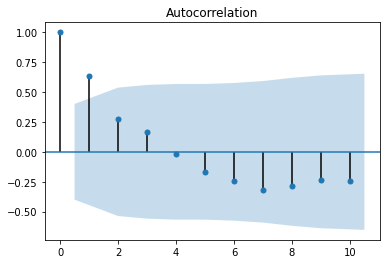

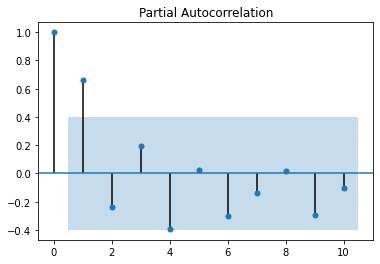

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price  \
0   2017     12            NaN                NaN                NaN   
1   2017     11       0.285978           1.032975         215.335058   
2   2017     10       0.487252           1.032975         234.691988   
3   2017      9       0.487252           1.032975         200.480652   
4   2017      8       0.487252           1.132975         215.006988   
5   2017      7       0.487252           1.252465         242.795651   
6   2017      6       0.487252           0.991446         224.405849   
7   2017      5       0.237252           1.071955         201.507829   
8   2017      4       0.438527           1.071955         196.906690   
9   2017      3       0.438527           1.171955         233.890254   
10  2017      2       0.188527           1.191446         190.449462   
11  2017      1       0.389802           1.310936         165.238125   
12  2016     12       0.389802           1.249916         181.51

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from pandas import DataFrame
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

def re_calc(df, features, error_param):


#  df[features] = df[features] - (error_param[0] * df[features].shift(1)+error_param[1] * df[features].shift(2))
#  df['Stock_Index_Price'] = df['Stock_Index_Price'] - (error_param[0] * df['Stock_Index_Price'].shift(1)+error_param[1] * df['Stock_Index_Price'].shift(2))
  df[features] = df[features] - (error_param[0] * df[features].shift(1))
  df['Stock_Index_Price'] = df['Stock_Index_Price'] - (error_param[0] * df['Stock_Index_Price'].shift(1))

  print(df)
  return df

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
x_features=['Interest_Rate','Unemployment_Rate']
X = df[x_features] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
#X = df[['Interest_Rate']] # here we have 1 variable for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets

Y = df['Stock_Index_Price']


df['predicted'] = sm.OLS(Y, X).fit().predict()

df['errors'] = df['Stock_Index_Price'] - df['predicted']

sm.graphics.tsa.plot_acf(df['errors'], lags=10)
plt.show()
sm.graphics.tsa.plot_pacf(df['errors'], lags=10)
plt.show()
df['lagged_errors'] = df['errors'].shift(1)
df['lagged_errors2']=df['errors'].shift(2)
#print(df)
#X= df.loc[df.index>1,['lagged_errors','lagged_errors2']]
X= df.loc[df.index>1,'lagged_errors']
Y=df.loc[df.index>1,'errors']

error_param = sm.OLS(Y,X).fit().params



recalculated_df = re_calc(df, x_features, error_param)
recalculated_df=recalculated_df.loc[recalculated_df.index>1]
X = recalculated_df[x_features]
Y = recalculated_df['Stock_Index_Price']
#print(recalculated_df)
X = sm.add_constant(X)
adjusted_model = sm.OLS(Y, X).fit()
print( adjusted_model.summary())



We have now adjusted our analysis to correctly deal with autocorrelation, and can with a fair degree of confidence say that the unemployement rate does not impact the stock index price and Interest rates does.